<a href="https://colab.research.google.com/github/zia207/python-colab/blob/main/NoteBook/Machine_Learning/Tree_based/03-01-02-01-tree-based-models-bagging-bagged-trees-python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![alt text](http://drive.google.com/uc?export=view&id=1xLlN9eEG2IYFBlAuwl53aDVxcBkRnkEw)

# 2.1 Bagging Decision Trees

Bagging Decision Trees, or Bootstrap Aggregating Decision Trees, is an ensemble machine learning technique that improves the stability and accuracy of decision trees by combining multiple trees trained on different subsets of the data. It reduces variance and helps prevent overfitting, which is a common issue with individual decision trees. Below, I’ll explain the concept, how it works, the important steps, and include relevant mathematical details.




## Overview

Bagging involves creating multiple decision trees by training each on a random subset of the training data, sampled with replacement (bootstrap sampling). The predictions from these trees are then aggregated, typically by majority voting for classification or averaging for regression, to produce a final prediction. This approach leverages the diversity of trees to improve robustness and generalization.

-   `Key Idea`: Each tree is trained on a slightly different dataset, making the trees less correlated. Combining their predictions reduces variance without significantly increasing bias.
-   `Purpose`: To address the high variance of single decision trees, which can overfit to noise in the data.

### Key Characteristics

1.  `Variance Reduction`:
    -   Decision trees have high variance (small changes in data can lead to different trees). Bagging reduces variance by averaging predictions, as shown in the variance formula above.
2.  `Parallelization`:
    -   Each tree is trained independently, making bagging computationally efficient with parallel processing.
3.  `No Bias Increase`:
    -   Since trees are unpruned, they have low bias. Bagging maintains this low bias while reducing variance.
4.  `Out-of-Bag (OOB) Error Estimation`:
    -   Data points not included in a bootstrap sample (about 36.8% of the data) can be used to estimate the model’s performance without a separate validation set.
    -   OOB error for a data point ( (x_i, y_i) ) is computed by averaging predictions from trees where ( (x_i, y_i) ) was not in the bootstrap sample.

### How Bagging Decision Trees Works

Bagging Decision Trees consists of three main steps:

1. Bootstrap Sampling

-   Randomly sample subsets of the training data with replacement.

-   Each subset (or "bootstrap sample") is used to train a separate decision tree.

-   Generate $B$ bootstrap samples $D_1, D_2, \dots, D_B$), where each $D_b$ is created by sampling $N$ data points from $D$ with replacement. \`

-   For a dataset $D$, the probability that a specific data point $(x_i, y_i)$ is included in a bootstrap sample is:

$$ P(\text{included}) = 1 - \left(1 - \frac{1}{N}\right)^N \approx 1 - e^{-1} \approx 0.632 $$

-   Each $D_b$ is a multiset of size $N$, drawn from $D$.

2. Training Individual Trees

-   Build a decision tree on each bootstrap sample without pruning (allowing trees to grow deep).

-   Each tree is trained independently, capturing different aspects of the data.

-   For `classification`, train a decision tree $T_b$ on each bootstrap sample $D_b$, for $b = 1, 2, \dots, B$.

-   At each node, a decision tree selects the feature and threshold that minimize an impurity measure, e.g., `Gini impurity`: \`

$$ \text{Gini}(D) = 1 - \sum_{k=1}^K p_k^2 $$ where $p_k$ is the proportion of class $k$ in the node, and $K$ is the number of classes.

-   The split that minimizes the weighted average impurity across child nodes is chosen:

$$ \text{Gini}_{\text{split}} = \sum_{m=1}^M \frac{N_m}{N} \text{Gini}(D_m) $$ where $N_m$ is the number of samples in child node $m$, and $M$ is the number of child nodes (usually 2 for binary splits).

-   For `regression`, \` - The tree minimizes the mean squared error (MSE) in each node:

$$ \text{MSE}(D) = \frac{1}{N} \sum_{i=1}^N (y_i - \bar{y})^2 $$ where $\bar{y}$ is the mean target value in the node.

-   Splits minimize the weighted average MSE across child nodes.

3. Aggregation

-   For `classification`: Combine predictions from all trees using majority voting.

-   For **regression**: Average the predictions from all trees.

-   Combine predictions from all $B$) trees to produce the final output.

-   For `classification`, each tree $T_b$) predicts a class $\hat{y}_b(x)$ for input $x$.

-   The final prediction is the majority vote:

$$ \hat{y}(x) = \text{mode} \left( \hat{y}_1(x), \hat{y}_2(x), \dots, \hat{y}_B(x) \right) $$

-   Alternatively, compute class probabilities by averaging the proportion of votes for each class:

$$ P(\text{class } k | x) = \frac{1}{B} \sum_{b=1}^B I(\hat{y}_b(x) = k) $$

where $I$ is the indicator function.

-   For regression:

    -   Each tree $T_b$ predicts a continuous value $\hat{y}_b(x)$.
    -   The final prediction is the average:

$$ \hat{y}(x) = \frac{1}{B} \sum_{b=1}^B \hat{y}_b(x) $$

-   Bagging reduces variance by averaging predictions. Suppose the variance of a single tree’s prediction is $\text{Var}(\hat{y}_b(x)) = \sigma^2$, and the correlation between trees is $\rho$.
-   The variance of the bagged prediction (for regression) is:

$$ \text{Var}(\hat{y}(x)) = \rho \sigma^2 + \frac{1 - \rho}{B} \sigma^2 $$

-   As $B \to \infty$, the second term vanishes, and the variance approaches $\rho \sigma^2$.
-   Since $rho < 1$ (trees are less correlated due to bootstrap sampling), bagging reduces variance compared to a single tree.

4. Prediction

-   Use the aggregated prediction as the final output for new, unseen data.
-   For a new input $x$, pass it through all $B$ trees and compute the aggregated prediction (majority vote for classification, average for regression).
-   The final model is robust because it averages out errors and noise captured by individual trees.


Here below is a flowchart illustrating the Bagging Decision Trees workflow:


![alt text](http://drive.google.com/uc?export=view&id=1BVwNxUCoPlvVOsxdUJ3YZIZQ1VcovfN8)





### Limitations

1.  `Computational Cost`: Training $B$ trees requires more computation than a single tree.
2.  `Interpretability`: A bagged model is less interpretable than a single decision tree.
3.  `Correlation Between Trees`: If bootstrap samples are too similar (e.g., due to a small dataset), trees may be correlated, reducing the effectiveness of variance reduction.


## Setup R in Python Runtype

### Install {rpy2}

{rpy2} is a Python package that provides an interface to the R programming language, allowing Python users to run R code, call R functions, and manipulate R objects directly from Python. It enables seamless integration between Python and R, leveraging R's statistical and graphical capabilities while using Python's flexibility. The package supports passing data between the two languages and is widely used for statistical analysis, data visualization, and machine learning tasks that benefit from R's specialized libraries.

In [ ]:
!pip uninstall rpy2 -y
!pip install rpy2==3.5.1
%load_ext rpy2.ipython

Found existing installation: rpy2 3.5.17
Uninstalling rpy2-3.5.17:
  Successfully uninstalled rpy2-3.5.17
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 201.7/201.7 kB 5.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for rpy2: filename=rpy2-3.5.1-cp311-cp311-linux_x86_64.whl size=314981 sha256=2c18a03c37784022f418b962f73e5561299f885bed087c1fe22f4fbcc270a225
  Stored in directory: /root/.cache/pip/wheels/e9/55/d1/47be85a5f3f1e1f4d1e91cb5e3a4dcb40dd72147f184c5a5ef
Successfully built rpy2


### Mount Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Bagging Decision Trees in Python from Scratch

Performing Bagging Decision Trees in Python without external packages requires implementing the algorithm from scratch using bPython functions. Below, I’ll provide a detailed explanation and R code to perform bagging for classification on the Iris dataset and regression on the Boston Housing dataset.


### Bootstrap Sampling: Generate random subsets of the data with replacement.

In [1]:
import numpy as np
from collections import Counter

def bootstrap_sample(X, y):
    """Generate a bootstrap sample from the dataset."""
    n = X.shape[0]
    indices = np.random.choice(n, size=n, replace=True)
    X_b = X[indices]
    y_b = y[indices]
    return {'X': X_b, 'y': y_b}


### Decision Tree Split Function

Build simple decision trees on each bootstrap sample using a custom implementation. Find the best feature and threshold for splitting.

The `simple_split()` R function finds the best feature and threshold to split data in a decision tree for classification or regression:

- Feature matrix `X`, target `y`, task type ("classification" or "regression").
-Classification: Maximizes information gain (reduces entropy).
- Regression: Minimizes weighted child node variance.
- Iterates over features and thresholds, evaluates splits, and skips invalid ones (<2 samples per side).

In [2]:
def simple_split(X, y, task="classification"):
    """Find a simple split based on minimizing Gini impurity (classification) or variance (regression)."""
    n_features = X.shape[1]
    best_feature, best_threshold, best_score = None, None, np.inf

    for feature in range(n_features):
        thresholds = np.unique(X[:, feature])
        for threshold in thresholds:
            left_idx = X[:, feature] <= threshold
            right_idx = ~left_idx

            if task == "classification":
                # Gini impurity for classification
                left_gini = 1 - sum((np.mean(y[left_idx] == c) ** 2 for c in np.unique(y[left_idx])))
                right_gini = 1 - sum((np.mean(y[right_idx] == c) ** 2 for c in np.unique(y[right_idx])))
                score = (sum(left_idx) * left_gini + sum(right_idx) * right_gini) / X.shape[0]
            else:
                # Variance for regression
                left_var = np.var(y[left_idx]) if sum(left_idx) > 0 else 0
                right_var = np.var(y[right_idx]) if sum(right_idx) > 0 else 0
                score = (sum(left_idx) * left_var + sum(right_idx) * right_var) / X.shape[0]

            if score < best_score:
                best_score = score
                best_feature = feature
                best_threshold = threshold

    if best_feature is None:
        return {'feature': None, 'threshold': None}
    return {'feature': best_feature, 'threshold': best_threshold}

### Aggregation: Combine predictions via majority voting (classification) or averaging (regression).

- `predict_tree()`: Predicts using a single tree. Returns leaf `value` if no split; else assigns `left_value` or `right_value` based on `feature` and `threshold`.
- `bagging_train()`: Trains `B` trees on bootstrap samples. Each tree stores split (`feature`, `threshold`, `left_value`, `right_value`) or leaf `value` (majority class or mean).
- `bagging_predict()`: Predicts with all trees. Aggregates by majority voting (classification) or averaging (regression).
- `evaluate_model()`**: Computes accuracy (classification) or MSE (regression), prints, and returns metric.
- `run_bagging()`: Runs bagging: trains `B` trees, predicts on training data, evaluates performance.


In [3]:
def predict_tree(X, tree, task="classification"):
    """Predict with a single decision tree."""
    if 'feature' not in tree or tree['feature'] is None:
        return np.full(X.shape[0], tree['value'])

    feature = tree['feature']
    threshold = tree['threshold']
    predictions = np.empty(X.shape[0], dtype=object if task == "classification" else float)

    for i in range(X.shape[0]):
        if X[i, feature] <= threshold:
            predictions[i] = tree['left_value']
        else:
            predictions[i] = tree['right_value']

    return predictions

def bagging_train(X, y, B=10, task="classification"):
    """Train a bagging ensemble of decision trees."""
    n = X.shape[0]
    trees = []

    for _ in range(B):
        # Bootstrap sample
        sample_data = bootstrap_sample(X, y)
        X_b = sample_data['X']
        y_b = sample_data['y']

        # Find best split
        split = simple_split(X_b, y_b, task)

        if split['feature'] is None:
            # No valid split: use majority class (classification) or mean (regression)
            if task == "classification":
                value = Counter(y_b).most_common(1)[0][0]
            else:
                value = np.mean(y_b)
            trees.append({'value': value})
        else:
            # Create left and right nodes
            left_idx = X_b[:, split['feature']] <= split['threshold']
            right_idx = ~left_idx

            if task == "classification":
                left_value = Counter(y_b[left_idx]).most_common(1)[0][0] if sum(left_idx) > 0 else Counter(y_b).most_common(1)[0][0]
                right_value = Counter(y_b[right_idx]).most_common(1)[0][0] if sum(right_idx) > 0 else Counter(y_b).most_common(1)[0][0]
            else:
                left_value = np.mean(y_b[left_idx]) if sum(left_idx) > 0 else np.mean(y_b)
                right_value = np.mean(y_b[right_idx]) if sum(right_idx) > 0 else np.mean(y_b)

            trees.append({
                'feature': split['feature'],
                'threshold': split['threshold'],
                'left_value': left_value,
                'right_value': right_value
            })

    return trees

def bagging_predict(X, trees, task="classification"):
    """Make predictions with the bagging ensemble."""
    n = X.shape[0]
    predictions = np.empty((n, len(trees)), dtype=object if task == "classification" else float)

    # Get predictions from each tree
    for b in range(len(trees)):
        predictions[:, b] = predict_tree(X, trees[b], task)

    # Aggregate predictions
    if task == "classification":
        # Majority voting
        final_predictions = np.array([Counter(row).most_common(1)[0][0] for row in predictions])
    else:
        # Average for regression
        final_predictions = np.mean(predictions, axis=1)

    return final_predictions

def evaluate_model(y_true, y_pred, task="classification"):
    """Evaluate the model performance."""
    if task == "classification":
        accuracy = np.mean(y_true == y_pred)
        print(f"Accuracy: {accuracy:.4f}")
        return accuracy
    else:
        mse = np.mean((y_true - y_pred) ** 2)
        print(f"Mean Squared Error: {mse:.4f}")
        return mse

def run_bagging(X, y, dataset_name, B=10, task="classification"):
    """Main function to run bagging."""
    print(f"Running Bagging on {dataset_name}")

    # Train model
    trees = bagging_train(X, y, B, task)

    # Predict on training data (for simplicity)
    predictions = bagging_predict(X, trees, task)

    # Evaluate
    evaluate_model(y, predictions, task)

### Example Usage- Classification

In [4]:
from sklearn.datasets import load_iris
# Load and prepare Iris data for classification
iris = load_iris()
X_iris = iris.data  # Features (columns 1:4 in R's iris dataset)
y_iris = iris.target  # Target (column 5 in R's iris dataset)

# Run bagging
run_bagging(X_iris, y_iris, "Iris", B=10, task="classification")

Running Bagging on Iris
Accuracy: 0.9600


### Example Usage- Regression



In [5]:
from sklearn.datasets import fetch_openml
import pandas as pd

# Load and prepare Boston Housing data for regression
boston = fetch_openml(name='boston', version=1, as_frame=True)
X_boston = boston.data  # Features (columns 1:13 in R's Boston dataset)
y_boston = boston.target  # Target (column 14, MEDV in R's Boston dataset)

# Convert to numpy arrays for compatibility with run_bagging
X_boston = X_boston.to_numpy()
y_boston = y_boston.to_numpy()

# Run bagging
run_bagging(X_boston, y_boston, "Boston Housing", B=10, task="regression")

Running Bagging on Boston Housing
Mean Squared Error: 36.8861


## Bagging Decision Trees  with Python

The R package {ipred} provides tools for `bagging (bootstrap aggregating)` decision trees, among other functionalities, with a focus on improved prediction through ensemble methods. In Python, the equivalent functionality for bagging decision trees can be achieved using the {scikit-learn} library, specifically the `BaggingClassifier` and `BaggingRegressor` classes for classification and regression tasks, respectively. These classes are robust, widely used, and offer similar capabilities to ipred's bagging functions, including support for `out-of-bag (OOB)` error estimation and flexible model configuration.

Below, I provide a step-by-step guide to implementing bagging decision trees in Python using scikit-learn, tailored to mimic the functionality of `pred::bagging` in R.



### Classifiaction Probelem



#### Data

We will `iris` dataset for this example. The `iris` dataset is a classic dataset in machine learning and statistics, containing measurements of various features of iris flowers. It has three classes of iris species: Setosa, Versicolor, and Virginica.


In [7]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import pandas as pd

# Set random seed for reproducibility
np.random.seed(123)

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target
# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Set Up the Bagging Classifier

The BaggingClassifier in {scikit-learn} is analogous to {ipred::bagging} in R. Key parameters to align with ipred include:

-`estimator`: Set to DecisionTreeClassifier (default in BaggingClassifier, similar to ipred’s default use of rpart trees).

-`n_estimators`: Number of bootstrap samples/trees (equivalent to nbagg in ipred).

-`max_samples`: Proportion or number of samples to draw for each bootstrap sample (controls bootstrap size).

-`bootstrap`: Set to True for sampling with replacement (core to bagging, as in ipred).

-`oob_score`: Set to True to compute the out-of-bag error, similar to coob=TRUE in ipred.


In [11]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score

# Define the base decision tree classifier
base_tree = DecisionTreeClassifier(random_state=42)

# Configure the bagging classifier
bagging_model = BaggingClassifier(
    estimator=base_tree,
    n_estimators=50,  # Number of trees, similar to nbagg in ipred
    max_samples=1.0,  # Use full training set size for each bootstrap sample
    bootstrap=True,   # Sampling with replacement
    oob_score=True,   # Enable out-of-bag error estimation
    random_state=42
)
# Fit the model
bagging_model.fit(X_train, y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(random_state=42),
                  n_estimators=50, oob_score=True, random_state=42)

#### Evaluate the Model

- `Out-of-Bag (OOB) Error`: Similar to `ipred’s coob=TRUE`, `scikit-learn `provides an OOB score for classification tasks when oob_score=True. The OOB score is the accuracy on the out-of-bag samples.

- `Test Set Accuracy`: Compute accuracy on the test set to evaluate performance.

In [12]:
from sklearn.metrics import accuracy_score

# Get OOB score (accuracy for classification)
oob_accuracy = bagging_model.oob_score_
print(f"Out-of-Bag Accuracy: {oob_accuracy:.4f}")

# Predict on test set
y_pred = bagging_model.predict(X_test)

# Compute test set accuracy
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Test Set Accuracy: {test_accuracy:.4f}")

Out-of-Bag Accuracy: 0.9250
Test Set Accuracy: 1.0000


#### Pruning

Bagging typically does not involve post-pruning individual trees, as the aggregation of many trees reduces overfitting. However, the `rpart.control(0`) parameters (e.g., `cp`) in the `bagging()` call control tree complexity during fitting. To inspect or adjust pruning for an individual tree, you can extract a tree from the ensemble

In [14]:
# Train a bagging ensemble
bagged_model = BaggingClassifier(
    estimator=DecisionTreeClassifier(random_state=123),
    n_estimators=10,
    random_state=123
)

bagged_model.fit(X_train, y_train)

# Extract the first tree from the bagging ensemble
single_tree = bagged_model.estimators_[0]

# Get the cost-complexity pruning path
pruning_path = single_tree.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = pruning_path.ccp_alphas
impurities = pruning_path.impurities

# Find the optimal ccp_alpha (lowest effective error, using impurity as proxy)
opt_ccp_alpha = ccp_alphas[np.argmin(impurities)]

# Prune the tree by creating a new tree with the optimal ccp_alpha
pruned_tree = DecisionTreeClassifier(random_state=123, ccp_alpha=opt_ccp_alpha)
pruned_tree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=np.float64(0.0), random_state=123)

#### Visualize the Pruned Tree



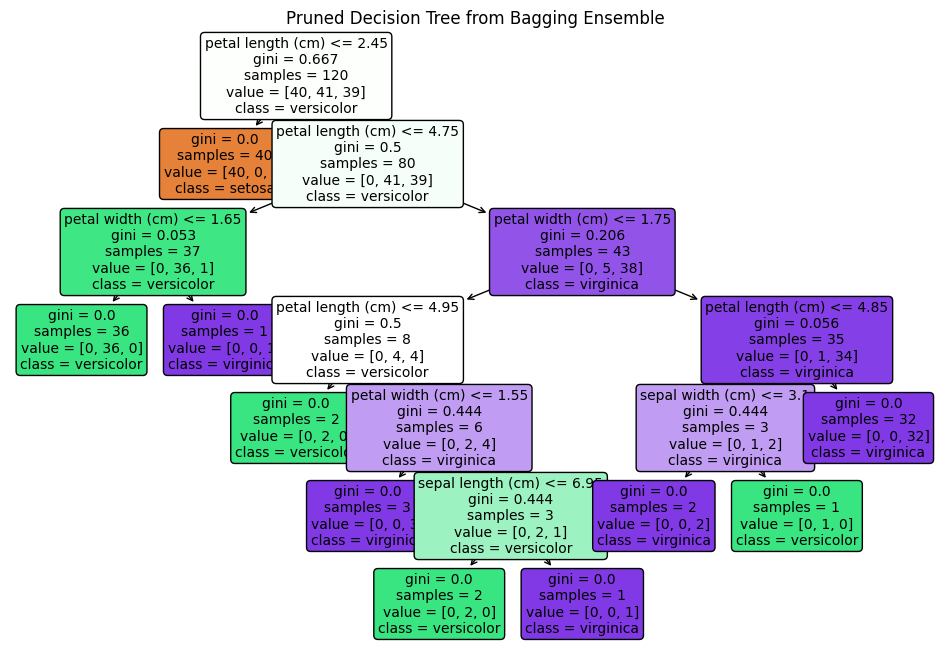

In [16]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Plot the pruned tree
plt.figure(figsize=(12, 8))
plot_tree(
    pruned_tree,
    feature_names=iris.feature_names,
    class_names=iris.target_names,
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title("Pruned Decision Tree from Bagging Ensemble")
plt.show()

#### Prediction and Evaluation

`Confusion Matrix`: A matrix showing true vs. predicted class counts for each class.

`Accuracy`: Proportion of correct predictions (total correct / total samples).

`Precision`: For each class, the proportion of true positive predictions out of all positive predictions (TP / (TP + FP)).

`Recall`: For each class, the proportion of true positives out of all actual positives (TP / (TP + FN)).

`F1 Score`: Harmonic mean of precision and recall for each class (2 * (Precision * Recall) / (Precision + Recall)).

`Specificity`: For each class, the proportion of true negatives out of all actual negatives (TN / (TN + FP)). In multiclass, this is calculated per class, treating it as a one-vs-rest problem.

In [22]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Custom function to calculate specificity for multiclass (per class)
def specificity_score(y_true, y_pred, labels):
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    specificity_per_class = []
    for i in range(len(labels)):
        tn = cm.sum() - (cm[i, :].sum() + cm[:, i].sum() - cm[i, i])  # TN = total - (TP + FN + FP - TP)
        fp = cm[:, i].sum() - cm[i, i]  # FP = predicted class i but not class i
        specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
        specificity_per_class.append(specificity)
    return specificity_per_class

In [23]:
# Predict on the test set
y_pred = pruned_tree.predict(X_test)

# Compute evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average=None)  # Per-class precision
recall = recall_score(y_test, y_pred, average=None)  # Per-class recall
f1 = f1_score(y_test, y_pred, average=None)  # Per-class F1 score
specificity = specificity_score(y_test, y_pred, labels=np.unique(y_test))  # Per-class specificity

# Macro-averaged metrics
macro_precision = precision_score(y_test, y_pred, average='macro')
macro_recall = recall_score(y_test, y_pred, average='macro')
macro_f1 = f1_score(y_test, y_pred, average='macro')
macro_specificity = np.mean(specificity)

# Print evaluation results
print("Evaluation of Pruned Decision Tree on Test Set")
print(f"Accuracy: {accuracy:.4f}")
print("\nPer-Class Metrics:")
for i, class_name in enumerate(iris.target_names):
    print(f"\nClass: {class_name}")
    print(f"  Precision: {precision[i]:.4f}")
    print(f"  Recall: {recall[i]:.4f}")
    print(f"  F1 Score: {f1[i]:.4f}")
    print(f"  Specificity: {specificity[i]:.4f}")
print("\nMacro-Averaged Metrics:")
print(f"  Precision: {macro_precision:.4f}")
print(f"  Recall: {macro_recall:.4f}")
print(f"  F1 Score: {macro_f1:.4f}")
print(f"  Specificity: {macro_specificity:.4f}")

Evaluation of Pruned Decision Tree on Test Set
Accuracy: 1.0000

Per-Class Metrics:

Class: setosa
  Precision: 1.0000
  Recall: 1.0000
  F1 Score: 1.0000
  Specificity: 1.0000

Class: versicolor
  Precision: 1.0000
  Recall: 1.0000
  F1 Score: 1.0000
  Specificity: 1.0000

Class: virginica
  Precision: 1.0000
  Recall: 1.0000
  F1 Score: 1.0000
  Specificity: 1.0000

Macro-Averaged Metrics:
  Precision: 1.0000
  Recall: 1.0000
  F1 Score: 1.0000
  Specificity: 1.0000


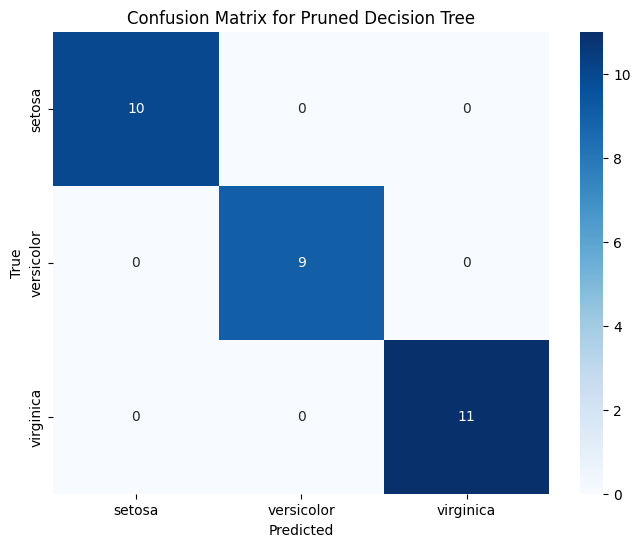

In [24]:
import seaborn as sns

# Compute and plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.title('Confusion Matrix for Pruned Decision Tree')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

#### Cross-validation



In [25]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation
cv_scores = cross_val_score(bagging_model, X, y, cv=5, scoring='accuracy')
print(f"Cross-Validation Accuracy: {np.mean(cv_scores):.4f} ± {np.std(cv_scores):.4f}")

Cross-Validation Accuracy: 0.9667 ± 0.0211


#### Variable Importance

`BaggingClassifier` can compute feature importance by averaging the importance scores from individual decision trees (based on Gini impurity reduction or similar metrics)


Variable Importance for Bagged Tree Model on Iris:
            Variable  Importance
2  petal length (cm)    0.619113
3   petal width (cm)    0.352402
1   sepal width (cm)    0.019312
0  sepal length (cm)    0.009173


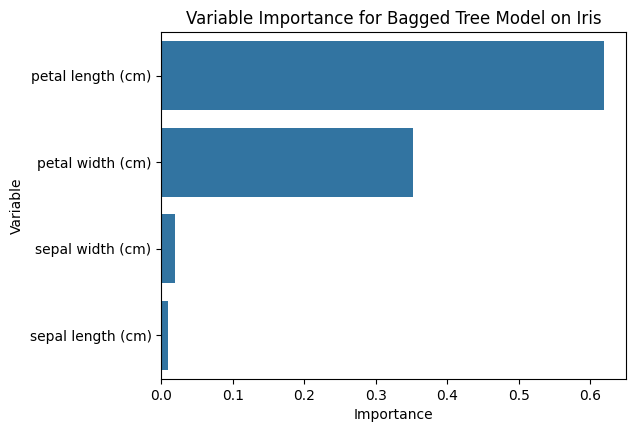

In [28]:
# Calculate variable importance
var_imp = [tree.feature_importances_ for tree in bagged_model.estimators_]
var_imp_matrix = np.array(var_imp)  # Shape: (n_estimators, n_features)
var_imp_mean = np.mean(var_imp_matrix, axis=0)  # Mean importance per feature

# Create a DataFrame for variable importance
var_imp_df = pd.DataFrame({
    'Variable': iris.feature_names,
    'Importance': var_imp_mean
}).sort_values(by='Importance', ascending=False)

# Print variable importance
print("\nVariable Importance for Bagged Tree Model on Iris:")
print(var_imp_df)

# Plot variable importance
plt.figure(figsize=(6, 4.5))
sns.barplot(x='Importance', y='Variable', data=var_imp_df, color='#1f77b4')
plt.title('Variable Importance for Bagged Tree Model on Iris')
plt.xlabel('Importance')
plt.ylabel('Variable')
plt.show()

#### Customizing Decision Tree Parameters

We can configure the `DecisionTreeClassifier` to control tree complexity.

- `min_samples_split`: Minimum number of samples required to split a node (like minsplit).

-`ccp_alpha`: Complexity parameter for pruning (like cp).

In [29]:
# Define a base decision tree with parameters similar to ipred's rpart
base_tree = DecisionTreeClassifier(
    min_samples_split=2,  # Similar to minsplit in rpart
    ccp_alpha=0.0,        # No pruning, similar to cp=0
    random_state=42
)

# Configure bagging classifier
bagging_model = BaggingClassifier(
    estimator=base_tree,
    n_estimators=50,
    max_samples=1.0,
    bootstrap=True,
    oob_score=True,
    random_state=42
)

# Fit and evaluate
bagging_model.fit(X_train, y_train)
print(f"Out-of-Bag Accuracy: {bagging_model.oob_score_:.4f}")
y_pred = bagging_model.predict(X_test)
print(f"Test Set Accuracy: {accuracy_score(y_test, y_pred):.4f}")

Out-of-Bag Accuracy: 0.9250
Test Set Accuracy: 1.0000


### Regression Problem



In [30]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_openml
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image

#### Data



In [31]:
# Load and prepare Boston Housing data
boston = fetch_openml(name='boston', version=1, as_frame=True)
X_boston = boston.data
y_boston = boston.target

# Convert to numpy arrays
X_boston = X_boston.to_numpy()
y_boston = y_boston.to_numpy()

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_boston, y_boston, test_size=0.2, random_state=123)

#### Fit Bagged Tree Model



In [32]:
# Fit Bagged Tree Model
bagged_model = BaggingRegressor(
    estimator=DecisionTreeRegressor(min_samples_split=5, ccp_alpha=0.01),
    n_estimators=100,
    bootstrap=True,
    oob_score=True,
    random_state=123
)
bagged_model.fit(X_train, y_train)

# Out-of-bag error (MSE)
oob_mse = mean_squared_error(y_train, bagged_model.oob_prediction_)
print(f"OOB MSE: {oob_mse:.3f}")

OOB MSE: 10.881


#### Prune Tree

In [33]:
# Pruning (for a single tree)
single_tree = bagged_model.estimators_[0]
# Note: In sklearn, pruning is handled via ccp_alpha in DecisionTreeRegressor
# To mimic R's pruning, we can re-fit a tree with optimal ccp_alpha
path = single_tree.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
# Find the ccp_alpha with minimum error (simulating R's xerror)
optimal_ccp_alpha = ccp_alphas[np.argmin(impurities)]
pruned_tree = DecisionTreeRegressor(ccp_alpha=optimal_ccp_alpha, random_state=123)
pruned_tree.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=np.float64(0.0), random_state=123)

#### Plot tree



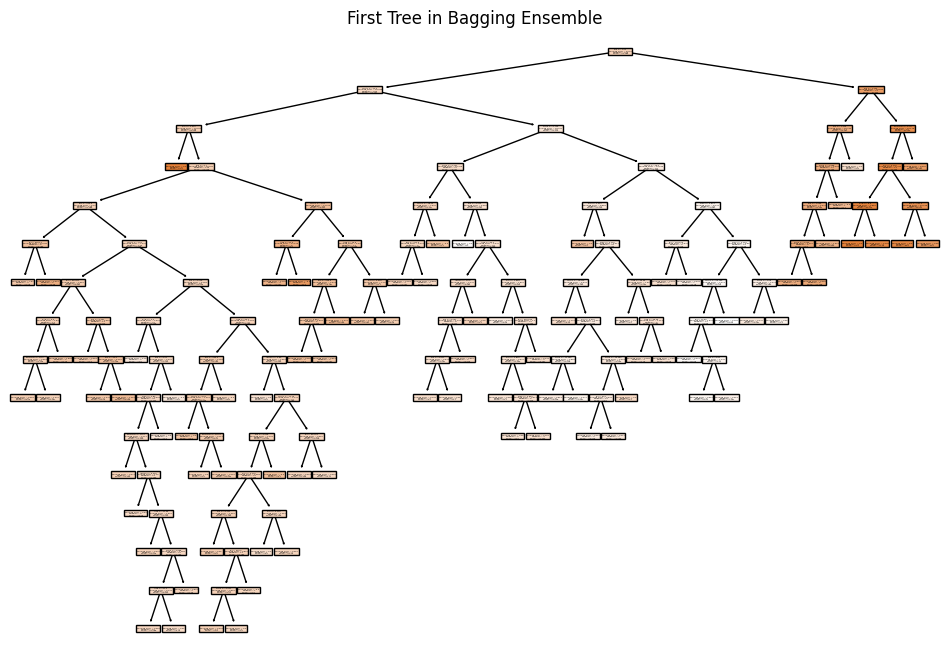

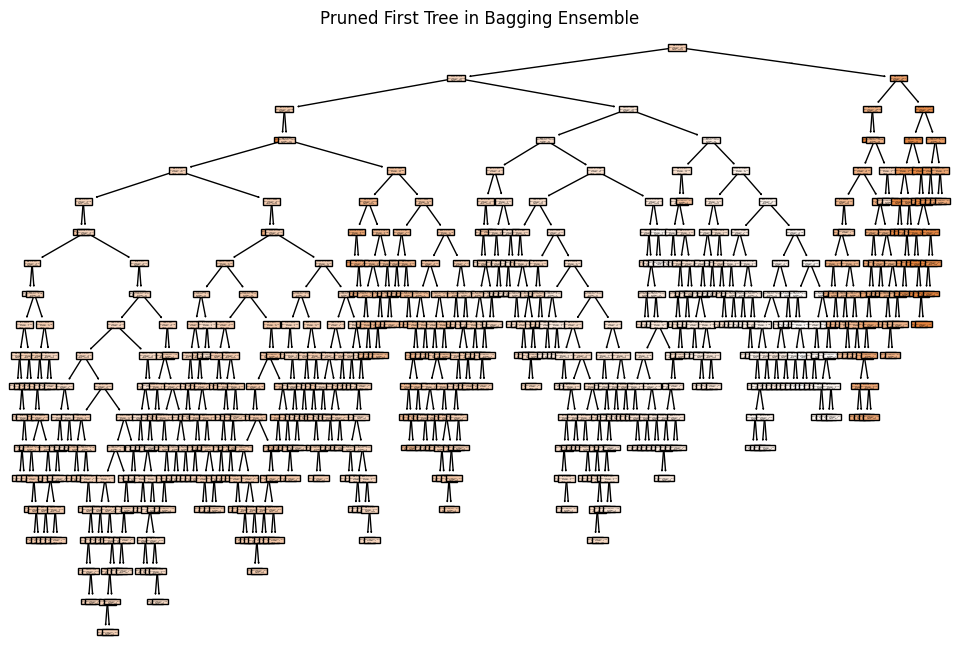

In [34]:
# Plot the first tree (unpruned and pruned)
plt.figure(figsize=(12, 8))
plot_tree(single_tree, feature_names=boston.feature_names, filled=True)
plt.title("First Tree in Bagging Ensemble")
plt.show()

plt.figure(figsize=(12, 8))
plot_tree(pruned_tree, feature_names=boston.feature_names, filled=True)
plt.title("Pruned First Tree in Bagging Ensemble")
plt.show()

#### Prediction and Evaluation

Test MSE: 19.145
Test R-squared: 0.769


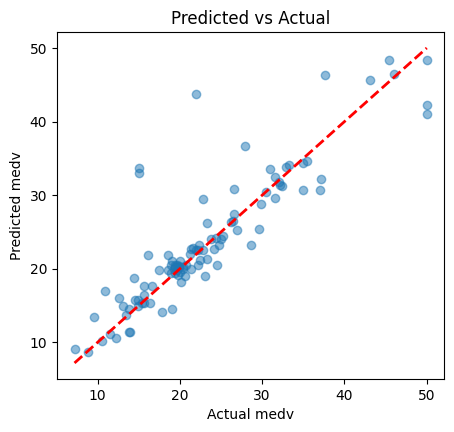

In [35]:
# Prediction and Evaluation
predictions = bagged_model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print(f"Test MSE: {mse:.3f}")

# Calculate R-squared
sst = np.sum((y_test - np.mean(y_test))**2)
sse = np.sum((predictions - y_test)**2)
rsq = 1 - sse / sst
print(f"Test R-squared: {rsq:.3f}")

# Plot predicted vs actual values
plt.figure(figsize=(5, 4.5))
plt.scatter(y_test, predictions, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual medv")
plt.ylabel("Predicted medv")
plt.title("Predicted vs Actual")
plt.show()

#### Cross-validation

In [36]:
# Cross-Validation
cv_scores = cross_val_score(bagged_model, X_boston, y_boston, cv=10, scoring='neg_mean_squared_error')
cv_error = -np.mean(cv_scores)
print(f"10-fold CV Error (MSE): {cv_error:.3f}")

10-fold CV Error (MSE): 21.929


#### Variable Importance



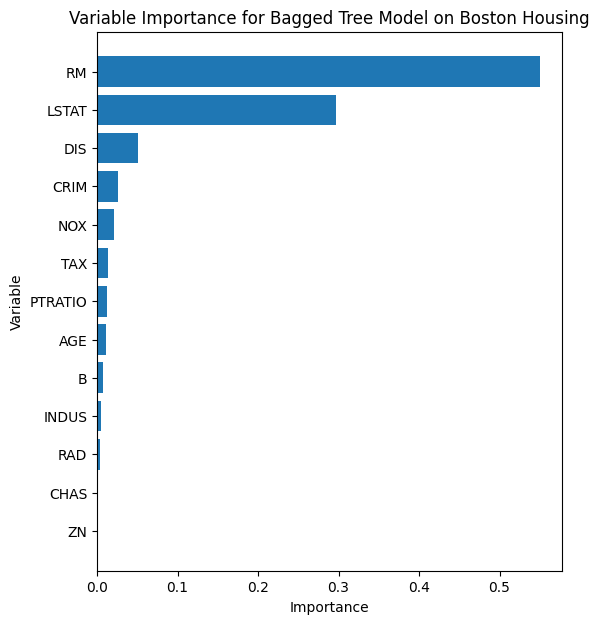

In [37]:
var_imp = np.mean([tree.feature_importances_ for tree in bagged_model.estimators_], axis=0)
var_imp_df = pd.DataFrame({
    'Variable': boston.feature_names,
    'Importance': var_imp
}).sort_values(by='Importance', ascending=False)

# Plot variable importance
plt.figure(figsize=(6, 7))
plt.barh(var_imp_df['Variable'], var_imp_df['Importance'], color='#1f77b4')
plt.xlabel('Importance')
plt.ylabel('Variable')
plt.title('Variable Importance for Bagged Tree Model on Boston Housing')
plt.gca().invert_yaxis()
plt.show()

## Summary and Conclusion

This notebook provides a comprehensive overview of Bagging Decision Trees, covering both theoretical concepts and practical implementation in Python.

The notebook begins by explaining the core principles of bagging, including bootstrap sampling, training individual trees, and aggregation techniques for both classification and regression tasks. It highlights the key characteristics of bagging, such as variance reduction, parallelization, and the use of out-of-bag error estimation.

The practical implementation section demonstrates how to perform bagging from scratch in Python, illustrating the steps of bootstrap sampling, decision tree splitting, and aggregation. This is followed by a detailed guide on using the `scikit-learn` library for bagging decision trees, showcasing its application to the Iris dataset for classification and the Boston Housing dataset for regression.

The examples cover various aspects of model evaluation, including:

- **Classification:** Out-of-bag accuracy, test set accuracy, confusion matrix, and per-class metrics (precision, recall, F1 score, specificity).
- **Regression:** Out-of-bag Mean Squared Error (MSE), test set MSE, R-squared, and predicted vs actual plots.

The notebook also demonstrates how to inspect and visualize individual trees within the ensemble and how to calculate variable importance for both classification and regression models. Finally, it shows how to perform cross-validation to get a more robust estimate of model performance.

In conclusion, Bagging Decision Trees is a powerful ensemble technique that effectively reduces variance and improves the stability and accuracy of decision tree models. The `scikit-learn` library provides a convenient and efficient way to implement bagging in Python, offering robust tools for model training, evaluation, and interpretation. The examples provided in this notebook serve as a practical guide for applying bagging to real-world classification and regression problems.

## References


1.  Breiman, L. (1996). "Bagging Predictors." Machine Learning, 24(2), 123-140.

2.  Breiman, L. (1998). "Arcing Classifiers." The Annals of Statistics, 26(3), 801-849.

3.  Dietterich, T. G. (2000). "An Experimental Comparison of Three Methods for Constructing Ensembles of Decision Trees: Bagging, Boosting, and Randomization." Machine Learning, 40(2), 139-157.

4.  Hastie, T., Tibshirani, R., & Friedman, J. (2009). "The Elements of Statistical Learning: Data Mining, Inference, and Prediction" (2nd Edition). Springer.

5.  Kuhn, M., & Johnson, K. (2013). "Applied Predictive Modeling." Springer.

6.  James, G., Witten, D., Hastie, T., & Tibshirani, R. (2013). "An Introduction to Statistical Learning: With Applications in R" (1st Edition). Springer.

7.  StatQuest by Josh Starmer: "Bagging (Bootstrap Aggregating) Clearly Explained" (YouTube, https://www.youtube.com/watch?v=sS5HyqaoAZQ)

8.  Towards Data Science: "Understanding Bagging and Random Forest" (https://towardsdatascience.com/understanding-bagging-and-random-forest-3e8f6e3e841b)

9.  Coursera: "Machine Learning by Andrew Ng" (https://www.coursera.org/learn/machine-learning)
